In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import time
from sklearn.linear_model import LinearRegression

In [20]:
def split(X,y):
    n = X.shape[0]
    n_test = n//5
    n_train = n - n_test
    test_indx = random.sample(range(n), n_test)
    x_train  = X.drop(test_indx).to_numpy()
    y_train  = y.drop(test_indx).to_numpy().reshape(n_train,1)
    x_test = X.iloc[test_indx,:].to_numpy()
    y_test  = y.iloc[test_indx].to_numpy().reshape(n_test,1)
    return x_train,y_train,x_test,y_test

def gradient(X, y, theta):
    h = np.dot(X, theta)
    grad = np.dot(X.transpose(), (h - y))
    return grad

def cost(X, y, theta):
    h = np.dot(X, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J[0]

def x_transform(X, degrees):
    t = X.copy()
    # Appending columns of higher degrees to X.
    for i in range(degrees):
        X = np.append(X, t**i, axis=1)   
    return X

def adagrad(X,gradient,learning_rate):
    eps = 1e-6
    g = np.zeros((X.shape[1],1))                 
    g = g + gradient*gradient                             
    step = learning_rate / (np.sqrt(g + 1e-6)) * gradient
    return step

def make_batch(X,y,batch_size = 32):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0]
    i = 0

    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
        return mini_batches

def gradientDescent(X, y, learning_rate=0.01, batch_size=32, epochs = 100, adaptive = False):
    theta = np.zeros((X.shape[1], 1))
    error_list = []
    for itr in range(epochs):
        mini_batches = make_batch(X,y)
        
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            if adaptive:
                step = adagrad(X_mini,gradient(X_mini, y_mini, theta),learning_rate)   
            else:
                step = learning_rate * gradient(X_mini, y_mini, theta)
            
            theta = theta - step
            error_list.append(cost(X_mini, y_mini, theta))

    return theta, error_list


def reg_plot(x_test,y_test,y_pred):
    plt.plot(np.arange(x_test.shape[0]), y_pred, color='r', label='pred')
    plt.plot(np.arange(x_test.shape[0]), y_test, color='g', label='real')
    plt.legend()
    plt.show()
    
def x_transform(X, degrees):
    t = X.copy()
    # Appending columns of higher degrees to X.
    for i in range(degrees):
        X = np.append(X, t**i, axis=1)   
    return X
    

In [21]:
df = pd.read_csv("Admission_Predict.csv")
df = df.drop(['Serial No.'],axis=1)
df.insert(7, 'Bias', np.ones(df.shape[0]), True)

In [22]:
x = df.drop(df.columns[8],axis=1)
y = df[df.columns[8]]

Run no.1 Time : 5.861997604370117 MSE = 0.0034286169744516056
Run no.2 Time : 22.624969482421875 MSE = 0.0036938807198134103
Run no.3 Time : 14.17994499206543 MSE = 0.00399781341931302
Run no.4 Time : 7.389068603515625 MSE = 0.0027750602790809573
Run no.5 Time : 4.747867584228516 MSE = 0.002957030920230687
Run no.6 Time : 3.0329227447509766 MSE = 0.004615027850691972
Run no.7 Time : 3.3669471740722656 MSE = 0.004027876943195296
Run no.8 Time : 2.651214599609375 MSE = 0.0027616034639145275
Run no.9 Time : 3.5490989685058594 MSE = 0.0030700962636243624
Run no.10 Time : 2.7709007263183594 MSE = 0.00482947504036174
Run no.11 Time : 4.103899002075195 MSE = 0.003731184811514999
Run no.12 Time : 10.666131973266602 MSE = 0.0036173919502744435
Run no.13 Time : 2.9740333557128906 MSE = 0.003190877326736014
Run no.14 Time : 2.526998519897461 MSE = 0.0034226577777905164
Run no.15 Time : 2.2640228271484375 MSE = 0.003113669268850786
Run no.16 Time : 2.5849342346191406 MSE = 0.003303612297022254
Run

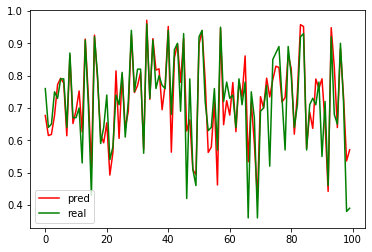

Average MSE:  0.003839957878592012
Average Run Time:  5.367004871368408


In [155]:
mse = []
run_time = []
for i in range(20):
    start = time.time()
    
    x_train,y_train,x_test,y_test = split(x,y)
    theta = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
    y_pred = x_test.dot(theta) 

    end = time.time()
    
    run_time.append((end-start) * 10**3)
    mse.append((np.square(y_pred - y_test)).mean())  
    
    print(f'Run no.{i+1} Time : { (end-start) * 10**3 } MSE = {(np.square(y_pred - y_test)).mean()}')
#     reg_plot(x_test,y_test,y_pred)
reg_plot(x_test,y_test,y_pred)
print('Average MSE: ',sum(mse) / len(mse))
print('Average Run Time: ',sum(run_time) / len(run_time))

# SGD & ADAGRAD

Run no.1 Time : 1562.974214553833 MSE = 0.4467989596931981
Run no.2 Time : 1282.2458744049072 MSE = 0.4619216156627025
Run no.3 Time : 1319.6239471435547 MSE = 0.4550702223755536
Run no.4 Time : 1441.6759014129639 MSE = 0.4305523713232317
Run no.5 Time : 1266.5071487426758 MSE = 0.45360384546835275
Run no.6 Time : 1274.8141288757324 MSE = 0.4722401405588848
Run no.7 Time : 1305.3100109100342 MSE = 0.46838417088302536
Run no.8 Time : 1274.6210098266602 MSE = 0.44780465474950765
Run no.9 Time : 1578.1209468841553 MSE = 0.5021991565312784
Run no.10 Time : 1299.5800971984863 MSE = 0.46808043650446474
Run no.11 Time : 1300.1437187194824 MSE = 0.4707829966352668
Run no.12 Time : 1284.9600315093994 MSE = 0.47490848928558504
Run no.13 Time : 1282.9310894012451 MSE = 0.4727967412306077
Run no.14 Time : 1295.896053314209 MSE = 0.44198984818718395
Run no.15 Time : 1596.0569381713867 MSE = 0.46686491248725587
Run no.16 Time : 1637.7689838409424 MSE = 0.4590829413657167
Run no.17 Time : 1285.218954

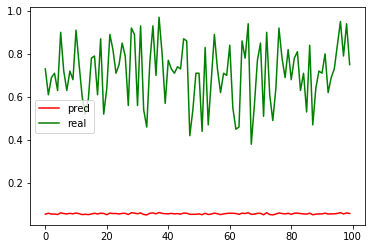

Average MSE:  0.46290032359435757
Average Run Time:  1361.5527749061584


In [15]:
mse = []
run_time = []
for i in range(20):
    x_train,y_train,x_test,y_test = split(x,y)

    start = time.time()
    # theta, error_list = gradientDescent(x_train, y_train,learning_rate=0.0000001,epochs= 100,adaptive = False)
    theta, error_list = gradientDescent(x_train, y_train,learning_rate=0.0000001,epochs= 100,adaptive = True)

    # theta, error_list = gradientDescent(x_train, y_train,learning_rate=0.00001,epochs= 100,adaptive = True)

    y_pred = np.dot(x_test, theta)
    end = time.time()
    
    run_time.append((end-start) * 10**3)
    mse.append((np.square(y_pred - y_test)).mean())  
    
    print(f'Run no.{i+1} Time : { (end-start) * 10**3 } MSE = {(np.square(y_pred - y_test)).mean()}')

reg_plot(x_test,y_test,y_pred)
print('Average MSE: ',sum(mse) / len(mse))
print('Average Run Time: ',sum(run_time) / len(run_time))

# Polynomial Regression

Run no.1 Time : 1296.633243560791 MSE = 0.016020747248275492
Run no.2 Time : 1485.353946685791 MSE = 0.011895926565115088
Run no.3 Time : 1913.5537147521973 MSE = 0.012676458318191091
Run no.4 Time : 1021.4138031005859 MSE = 0.01578139094112113
Run no.5 Time : 1064.877986907959 MSE = 0.013657850697919012
Run no.6 Time : 991.8117523193359 MSE = 0.016930979538868785
Run no.7 Time : 893.686056137085 MSE = 0.010963594639786911
Run no.8 Time : 915.1670932769775 MSE = 0.01349588104530128
Run no.9 Time : 891.3829326629639 MSE = 0.013456996261224687
Run no.10 Time : 1060.3373050689697 MSE = 0.01571611621778794
Run no.11 Time : 1023.5772132873535 MSE = 0.012682030265212136
Run no.12 Time : 1562.8859996795654 MSE = 0.012539817036937961
Run no.13 Time : 1487.673282623291 MSE = 0.016292913920848154
Run no.14 Time : 1088.738203048706 MSE = 0.0150372573787472
Run no.15 Time : 1237.8311157226562 MSE = 0.013305154371298523
Run no.16 Time : 1189.6650791168213 MSE = 0.01467380430618322
Run no.17 Time : 

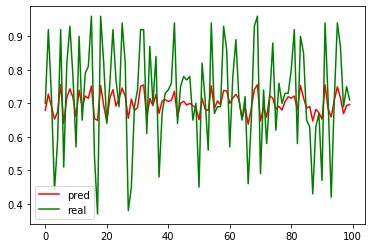

Average MSE:  0.013982338010463006
Average Run Time:  1190.8263325691223


In [43]:
mse = []
run_time = []

degrees = 2
for i in range(20):
    
    x_train,y_train,x_test,y_test = split(x,y)
    
    start = time.time()
    x_train_t = x_transform(x_train, degrees)
    theta, error_list = gradientDescent(x_train_t, y_train,learning_rate=0.0000001,epochs= 100)
    y_pred = np.dot(x_transform(x_test, degrees), theta)
    
    end = time.time()
    run_time.append((end-start) * 10**3)
    mse.append((np.square(y_pred - y_test)).mean())  
    
    print(f'Run no.{i+1} Time : { (end-start) * 10**3 } MSE = {(np.square(y_pred - y_test)).mean()}')

reg_plot(x_test,y_test,y_pred)
print('Average MSE: ',sum(mse) / len(mse))
print('Average Run Time: ',sum(run_time) / len(run_time))